# Desafío - Árboles de regresión (Sebastian Rebolledo)

### Ejercicio 1: Preparación del ambiente de trabajo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lec7_graphs as afx
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from joblib import dump, load

In [2]:
df = pd.read_csv('ames_housing.csv').drop(['Unnamed: 0'], axis=1)

In [3]:
df

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Split_or_Multilevel,Residential_Low_Density,37,7937,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,Good_Privacy,None,0,3,2006,WD,Normal,142500,-93.604776,41.988964
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8885,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,Minimum_Privacy,None,0,6,2006,WD,Normal,131000,-93.602680,41.988314
2927,Split_Foyer,Residential_Low_Density,62,10441,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,Shed,700,7,2006,WD,Normal,132000,-93.606847,41.986510
2928,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77,10010,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,4,2006,WD,Normal,170000,-93.600190,41.990921


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   int64  
 3   Lot_Area            2930 non-null   int64  
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

In [5]:
df['MS_SubClass'].dtype

dtype('O')

In [6]:
df.sample(2, random_state=1)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
2126,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,60,8070,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,8,2007,WD,Normal,123600,-93.692415,42.019028
192,Two_and_Half_Story_All_Ages,Residential_Low_Density,0,7793,Pave,No_Alley_Access,Slightly_Irregular,Bnk,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,209500,-93.625825,42.030187


In [7]:
df['Lot_Frontage'].dtype

dtype('int64')

<Figure size 1080x720 with 0 Axes>

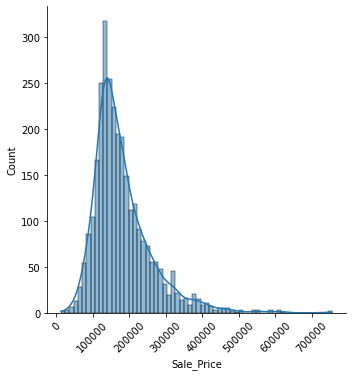

In [8]:
plt.figure(figsize=(15 , 10))
sns.displot(data=df,x='Sale_Price', kde=True)
plt.xticks(rotation=45)
plt.show()

### Ejercicio 2: Feature engineering 

In [9]:
df.Heating.dtype

dtype('O')

In [10]:
drop_col = []
columnas = df.columns
for col in columnas:
    if df[col].dtype == 'O':
        drop_col.append(col)
        df = pd.concat([df, pd.get_dummies(df[col], drop_first=True, prefix=col)], axis=1)

In [11]:
df = df.drop(columns=drop_col)

In [12]:
df.iloc[:,30:50]

,Mo_Sold,Year_Sold,Sale_Price,Longitude,Latitude,MS_SubClass_One_Story_1945_and_Older,MS_SubClass_One_Story_1946_and_Newer_All_Styles,MS_SubClass_One_Story_PUD_1946_and_Newer,MS_SubClass_One_Story_with_Finished_Attic_All_Ages,MS_SubClass_One_and_Half_Story_Finished_All_Ages,MS_SubClass_One_and_Half_Story_PUD_All_Ages,MS_SubClass_One_and_Half_Story_Unfinished_All_Ages,MS_SubClass_PUD_Multilevel_Split_Level_Foyer,MS_SubClass_Split_Foyer,MS_SubClass_Split_or_Multilevel,MS_SubClass_Two_Family_conversion_All_Styles_and_Ages,MS_SubClass_Two_Story_1945_and_Older,MS_SubClass_Two_Story_1946_and_Newer,MS_SubClass_Two_Story_PUD_1946_and_Newer,MS_SubClass_Two_and_Half_Story_All_Ages
0,5,2010,215000,-93.619754,42.054035,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,2010,105000,-93.619756,42.053014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,2010,172000,-93.619387,42.052659,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2010,244000,-93.617320,42.051245,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,2010,189900,-93.638933,42.060899,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,3,2006,142500,-93.604776,41.988964,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2926,6,2006,131000,-93.602680,41.988314,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2927,7,2006,132000,-93.606847,41.986510,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2928,4,2006,170000,-93.600190,41.990921,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Ejercicio 3: Primer modelo 

In [13]:
y=df['Sale_Price']
x=df.drop(columns=['Sale_Price'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=1323)

In [14]:
tree_model = DecisionTreeRegressor().fit(X_train, y_train)

In [15]:
def metricas(y_test, x_test ,model):
    y_predict = model.predict(x_test)
    
    print(f'Test MSE: {mean_squared_error(y_test, y_predict).round(5)}')
    print(f'Test MAE: {median_absolute_error(y_test, y_predict).round(5)}')
    print(f'Test R2:  {r2_score(y_test, y_predict).round(5)}')
    

In [16]:
df['Sale_Price'].mean()

180796.0600682594

In [17]:
df['Sale_Price'].std()

79886.69235666493

In [18]:
metricas(y_test,X_test, tree_model)

Test MSE: 1885129169.93899
Test MAE: 17500.0
Test R2:  0.71102


- Se observa un valor de **MSE** muy elevado, lo que se puede explicar debido al alto valor de la desviacion estandar y a que es una metrica elevada al cuadrado que castiga mucho los valores atipicos en la muestra.
- El valor de **MAE**, es mucho menor que el valor promedio de Sale_Price y su desviación estandar, por lo que se considera un modelo aceptable.
- El valor de **R2** nos indica el desempeño general del modelo el cual es bueno, pero es mejorable.

### Ejercicio 4: Importancia relativa

In [19]:
tree_model.feature_importances_

array([5.37023737e-03, 1.32047499e-02, 1.50278744e-01, 9.93023779e-03,
       3.68433268e-03, 2.48051500e-03, 2.14791507e-05, 1.10008387e-02,
       8.39365886e-02, 2.08532174e-02, 1.34501528e-02, 0.00000000e+00,
       1.52565273e-01, 1.16161345e-03, 1.28512719e-05, 2.82018838e-03,
       1.08770997e-04, 2.82235839e-04, 4.51667842e-04, 1.05629299e-03,
       2.55428139e-02, 3.81093608e-01, 6.80185131e-03, 2.53186292e-03,
       2.05007813e-03, 4.09494172e-04, 2.24157336e-05, 1.79050712e-04,
       0.00000000e+00, 5.65560261e-06, 4.44635592e-03, 1.51586466e-03,
       8.64525923e-03, 1.33313809e-02, 3.03913043e-05, 4.78333576e-05,
       6.14075305e-07, 0.00000000e+00, 4.17583223e-04, 0.00000000e+00,
       0.00000000e+00, 9.08395421e-08, 0.00000000e+00, 1.84236049e-07,
       4.29570102e-05, 1.61506506e-04, 3.78299166e-05, 1.62030828e-07,
       1.94329332e-05, 7.67477049e-09, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.97355534e-03, 6.64998788e-04, 0.00000000e+00,
      

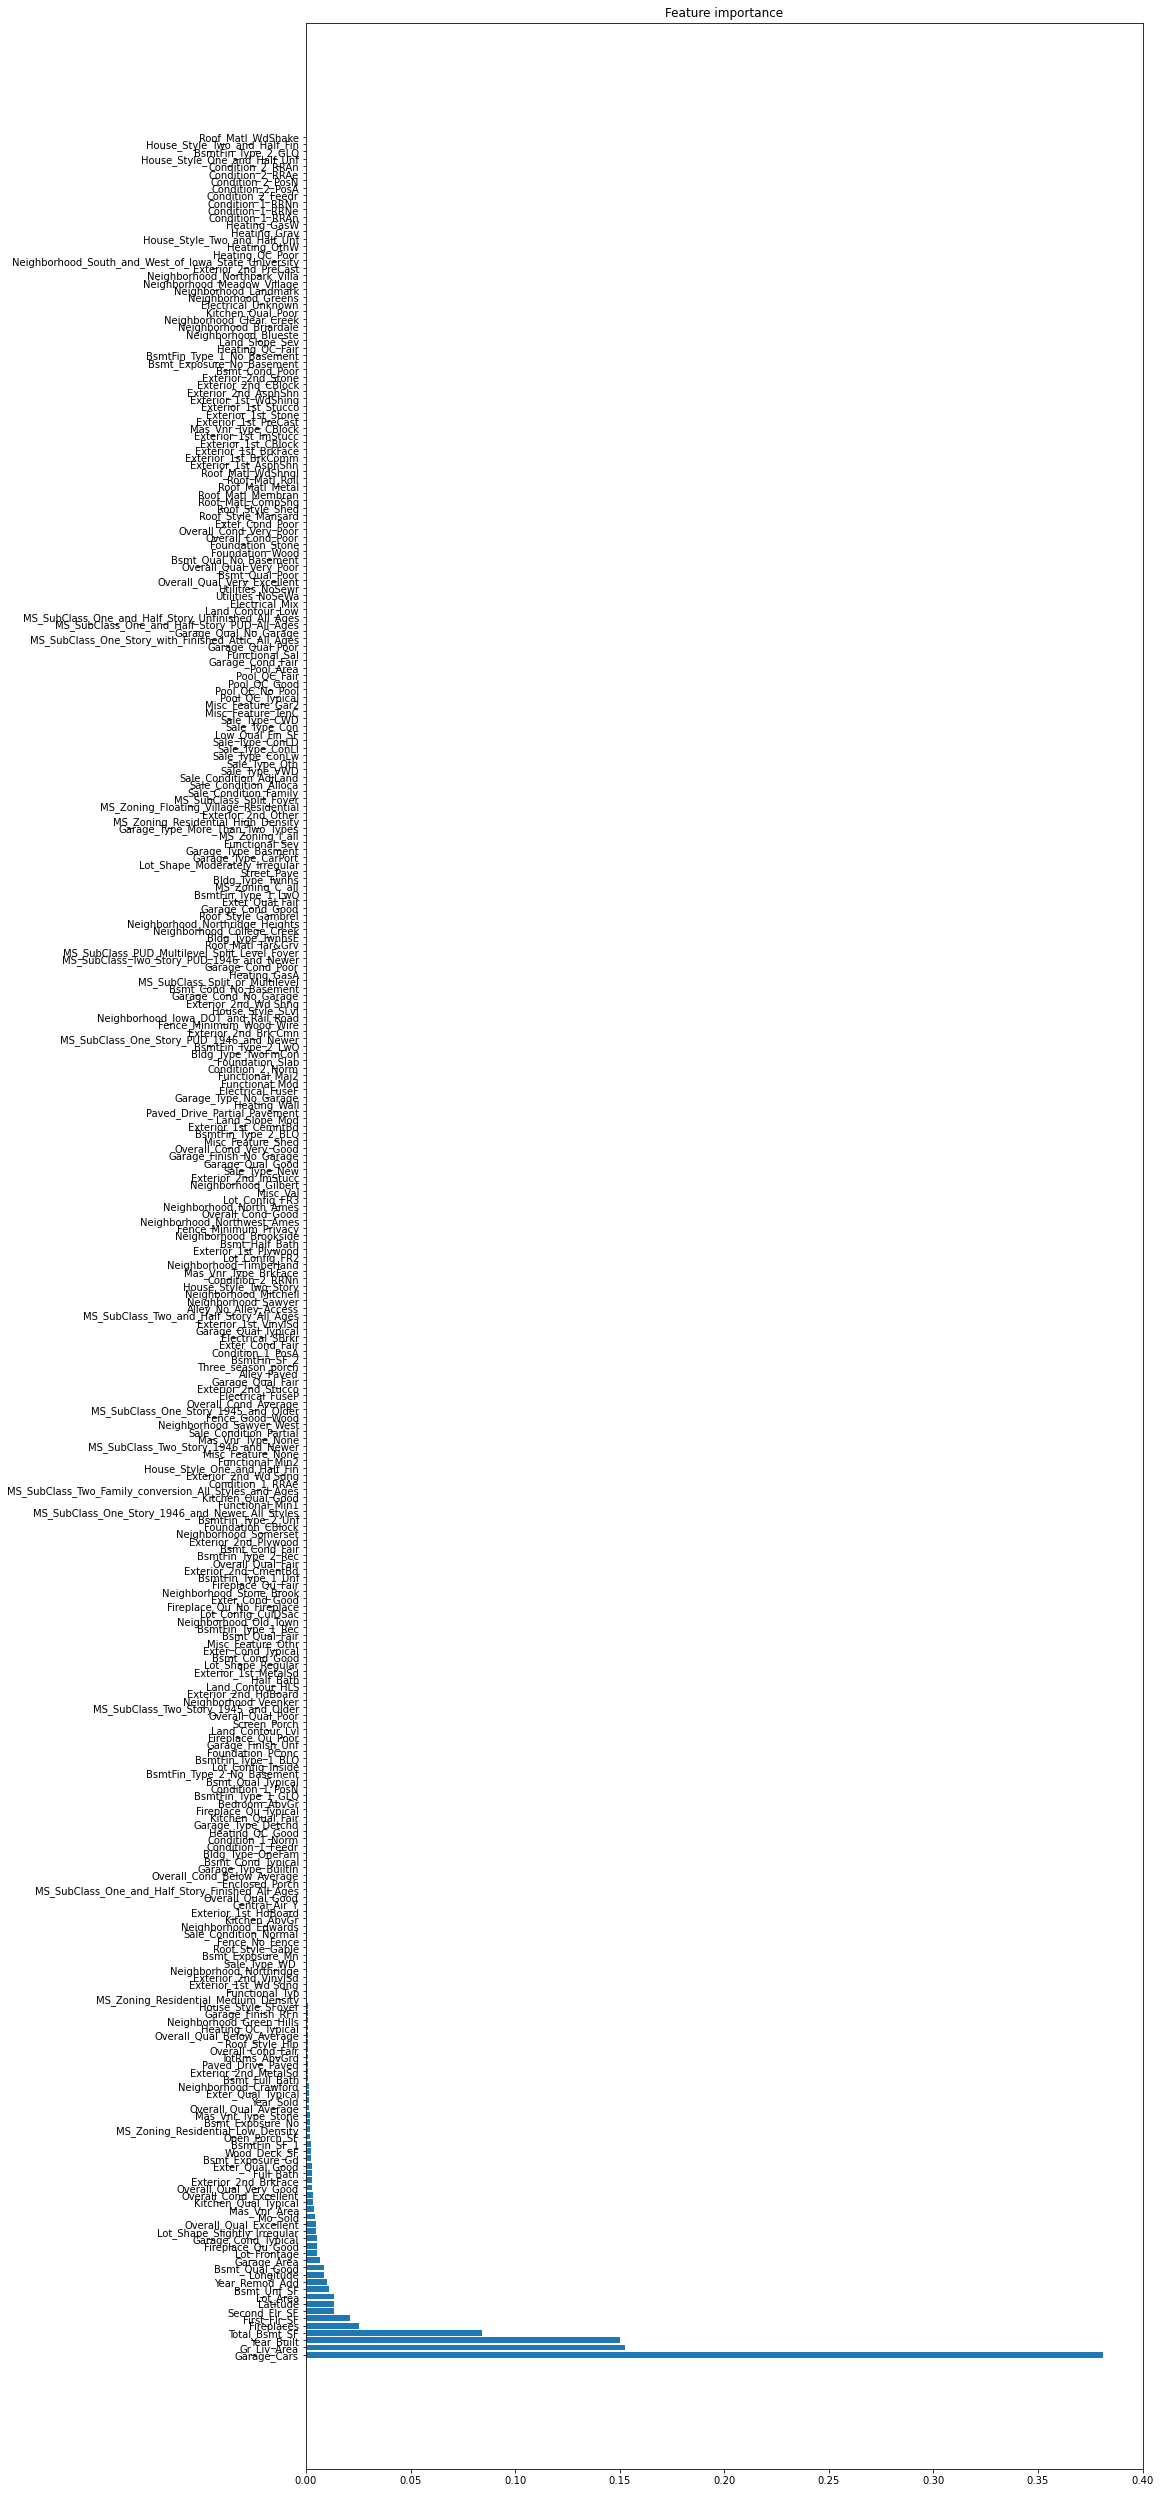

In [20]:
plt.figure(figsize=(15,45))
afx.plot_importance(tree_model, x.columns)

In [21]:
importance_tree_model = pd.DataFrame({'name_col': x.columns, 'value': tree_model.feature_importances_}) 

In [22]:
attr_10 = importance_tree_model.sort_values(by=['value'], 
                                            ascending=False).head(10).set_index('name_col')

##### Los 10 principales atributos que afectan la prediccion de Sale_Price 

In [23]:
attr_10

,value
name_col,
Garage_Cars,0.381094
Gr_Liv_Area,0.152565
Year_Built,0.150279
Total_Bsmt_SF,0.083937
Fireplaces,0.025543
First_Flr_SF,0.020853
Second_Flr_SF,0.013450
Latitude,0.013331
Lot_Area,0.013205


In [24]:
new_df=df[attr_10.transpose().columns]

In [25]:
attr_10.transpose().columns

Index(['Garage_Cars', 'Gr_Liv_Area', 'Year_Built', 'Total_Bsmt_SF',
       'Fireplaces', 'First_Flr_SF', 'Second_Flr_SF', 'Latitude', 'Lot_Area',
       'Bsmt_Unf_SF'],
      dtype='object', name='name_col')

In [26]:
new_df

,Garage_Cars,Gr_Liv_Area,Year_Built,Total_Bsmt_SF,Fireplaces,First_Flr_SF,Second_Flr_SF,Latitude,Lot_Area,Bsmt_Unf_SF
0,2,1656,1960,1080,2,1656,0,42.054035,31770,441
1,1,896,1961,882,0,896,0,42.053014,11622,270
2,1,1329,1958,1329,0,1329,0,42.052659,14267,406
3,2,2110,1968,2110,2,2110,0,42.051245,11160,1045
4,2,1629,1997,928,1,928,701,42.060899,13830,137
...,...,...,...,...,...,...,...,...,...,...
2925,2,1003,1984,1003,0,1003,0,41.988964,7937,184
2926,2,902,1983,864,0,902,0,41.988314,8885,239
2927,0,970,1992,912,0,970,0,41.986510,10441,575
2928,2,1389,1974,1389,1,1389,0,41.990921,10010,195


In [27]:
y

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: Sale_Price, Length: 2930, dtype: int64

### Ejercicio 5: Refactorización del modelo y picklingpd.get_dummies 

In [28]:
x_new=new_df
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(x_new, y, test_size=.33, random_state=1254)

##### Al ser un modelo con pocas columnas (solo 10), decido usarlas todas en el modelo final.  Y utilizo la grilla para buscar un mejor valor para max_depth
##### Aumento el valor de croos validation para obtener un mejor resultado en la busqueda del hiperparametro max_depth. 

In [29]:
%%time
tree_para = {'max_depth':[10,30,50,70]}
model_tree_grid_cv = GridSearchCV(DecisionTreeRegressor(),
                                  tree_para, cv=10, n_jobs=-1).fit(X_train_new, y_train_new)

CPU times: user 130 ms, sys: 50.3 ms, total: 180 ms
Wall time: 2.02 s


In [30]:
model_tree_grid_cv.best_params_

{'max_depth': 10}

In [31]:
final_model_tree =DecisionTreeRegressor(max_depth=10, max_features=10).fit(X_train_new, y_train_new)

In [32]:
df['Sale_Price'].mean()

180796.0600682594

In [33]:
df['Sale_Price'].std()

79886.69235666493

In [34]:
metricas(y_test_new,X_test_new, final_model_tree)

Test MSE: 1249641904.32081
Test MAE: 14698.65854
Test R2:  0.80324


- Se observa que el valor de **MSE** continua alto, aunque disminuyo un poco con respecto al modelo sin hiperparametros.
- El Test **MAE** disminuyo su valor con respecto al modelo sin hiperparametros. Lo que indica un mejor desempeño con respecto al modelo anterior. 
- EL Test **R2** aumento su valor llegando a 0.78, lo cual es buen valor para este modelo y el maximo que se podria obtener según el analisis realizado por gridCV buscando el mejor valor de max_depth, que a su vez mejore el desempeño del modelo.

#### Joblib

In [35]:
dump(final_model_tree, 'modelo_arboles_regresion.pkl')

['modelo_arboles_regresion.pkl']